In [82]:
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [88]:
hdulist = fits.open('N3115_phot_colorcorr_extcorr_CaT.fits')
header = hdulist[0].header
tbdata = hdulist[1].data
cols = hdulist[1].columns
cols.info()
coords = SkyCoord(ra=tbdata['RA']*u.degree,dec=tbdata['DEC']*u.degree)
ra_diff = coords.ra.degree - 151.308250
dec_diff = coords.dec.degree + 7.718583
distance = (ra_diff**2 + dec_diff**2)**0.5
good = np.where(np.logical_and(tbdata['PHOTGC'] == 1,distance < 0.25))

ra = ra_diff[good]
dec = dec_diff[good]

gmag = tbdata['GMAG'][good]
rmag = tbdata['RMAG'][good]
imag = tbdata['IMAG'][good]
ri = rmag-imag
gi = gmag-imag

name:
    ['RA', 'DEC', 'GMAG', 'ERRGMAG', 'RMAG', 'ERRRMAG', 'IMAG', 'ERRIMAG', 'FWHM_WORLD', 'PHOTGC', 'SPECGC', 'CATGC', 'EBV', 'GEXT', 'REXT', 'IEXT', 'ZP_G', 'ZP_R', 'ZP_I', 'VEL', 'ERRVEL', 'DVEL', 'LVEL', 'PVEL', 'KVEL', 'DWVEL', 'IVEL', 'IDN', 'SN', 'CAT', 'ECAT', 'Z', 'EZ', 'IDN_1', 'SN_1', 'CAT_1', 'ECAT_1', 'Z_1', 'EZ_1', 'DELTAZ', 'DELTACAT', 'REDUNDANT']
format:
    ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', '23A', 'E', 'E', 'E', 'E', 'E', '20A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I']
unit:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', 

623

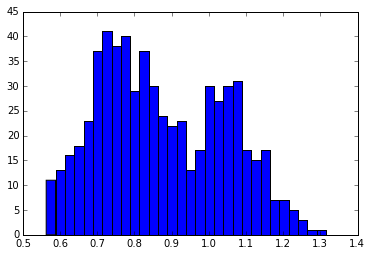

In [127]:
plt.hist(gi,bins=30)
foo = np.where(gi < 0.95)
gi.size

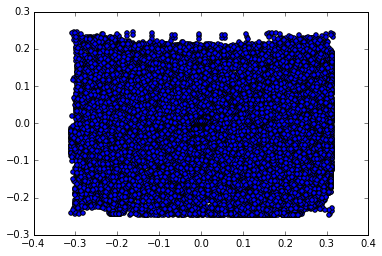

In [84]:
plt.scatter(ra_diff,dec_diff)

In [109]:
write_array = np.vstack((gi,ri,ra,dec)).T
np.savetxt("n3115_phot_data.csv", write_array, delimiter=",")    

In [110]:
write_array.shape

(623, 4)

In [113]:
foo = np.loadtxt('n3115_phot_data.csv',delimiter=',')

In [114]:
foo.shape

(623, 4)

In [129]:
fits.info('ngvs_bg_1_r_crop.fits')

IOError: [Errno 2] No such file or directory: 'ngvs_bg_1_r_crop.fits'